In [1]:
from typing import List
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import defaultdict

In [2]:
config_dirs = [
    '/home/veteran/Computer-Architecture-Lab-CSE220/lab3/outputs_2/conf1/',
    '/home/veteran/Computer-Architecture-Lab-CSE220/lab3/outputs_2/conf2/',
    '/home/veteran/Computer-Architecture-Lab-CSE220/lab3/outputs_2/conf3/',
    '/home/veteran/Computer-Architecture-Lab-CSE220/lab3/outputs_2/conf4/',
    '/home/veteran/Computer-Architecture-Lab-CSE220/lab3/outputs_2/conf5/',
    '/home/veteran/Computer-Architecture-Lab-CSE220/lab3/outputs_2/conf6/',
    '/home/veteran/Computer-Architecture-Lab-CSE220/lab3/outputs_2/conf7/',
]

spec_names = sorted([
    'drmemtrace.omnetpp.552936.5555.dir',
    'drmemtrace.sgcc_base.mytest-m64.555062.6619.dir',
    'drmemtrace.specrand_i.553922.3230.dir',
    'drmemtrace.perlbench_s_base.mytest-m64.554262.0160.dir',
    'drmemtrace.leela_s_base.mytest-m64.555086.8417.dir',
    'drmemtrace.x264.555077.8155.dir',
    'drmemtrace.deepsjeng.553743.1618.dir',
    'drmemtrace.exchange2.553888.1738.dir',
    'drmemtrace.mcf_s_base.mytest-m64.554166.9011.dir',
    'drmemtrace.xalancbmk_s_base.mytest-m64.555084.9837.dir'
])

image_path = '/home/veteran/Computer-Architecture-Lab-CSE220/lab3/images/'

In [3]:
def get_simple_name(spec_path: str) -> str:
    return spec_path.split('.')[1]

In [4]:
configs = [F'conf_{i}' for i in range(1, 8)]
simple_names = [get_simple_name(spec) for spec in spec_names]

In [5]:
def extract_one_spec(spec: str) -> List[float]:
    ipc_dict = dict()
    dcms_dict = dict()
    cold_dict = dict()
    cpt_dict = dict()
    cft_dict = dict()
    dcms_no_dict = dict()
    for i, config in enumerate(config_dirs):
        stat_path = F'{config}{spec}/memory.stat.0.out'
        mem_file = open(stat_path)
        m_lines = mem_file.readlines()
        key = F'conf_{i + 1}'
        ipc_dict[key] = float(m_lines[4].split()[-1])
        dcms_dict[key] = float(m_lines[31].split()[2][:-1])
        cold_dict[key] = float(m_lines[37].split()[1])
        cpt_dict[key] = float(m_lines[39].split()[1])
        cft_dict[key] = float(m_lines[41].split()[1])
        dcms_no_dict[key] = float(m_lines[31].split()[1])
    return ipc_dict, dcms_dict, cold_dict, cpt_dict, cft_dict, dcms_no_dict

In [6]:
spec_data = defaultdict(dict)
for spec in spec_names:
    data_lst = extract_one_spec(spec)
    spec_data[get_simple_name(spec)]['ipc'] = data_lst[0]
    spec_data[get_simple_name(spec)]['dcms'] = data_lst[1]
    spec_data[get_simple_name(spec)]['cold'] = data_lst[2]
    spec_data[get_simple_name(spec)]['cpt'] = data_lst[3]
    spec_data[get_simple_name(spec)]['cft'] = data_lst[4]
    spec_data[get_simple_name(spec)]['dcms_no'] = data_lst[5]

In [7]:
ipc_df = pd.DataFrame({key: spec_data[key]['ipc'] for key in spec_data})
dcms_df = pd.DataFrame({key: spec_data[key]['dcms'] for key in spec_data})
cold_df = pd.DataFrame({key: spec_data[key]['cold'] for key in spec_data})
cpt_df = pd.DataFrame({key: spec_data[key]['cpt'] for key in spec_data})
cft_df = pd.DataFrame({key: spec_data[key]['cft'] for key in spec_data})
dcms_no_df = pd.DataFrame({key: spec_data[key]['dcms_no'] for key in spec_data})

ipc_df['average'] = ipc_df.mean(1)
dcms_df['average'] = dcms_df.mean(1)
cold_df['average'] = cold_df.mean(1)
cpt_df['average'] = cpt_df.mean(1)
cft_df['average'] = cft_df.mean(1)
dcms_no_df['average'] = dcms_no_df.mean(1)

In [8]:
ipc_df

,deepsjeng,exchange2,leela_s_base,mcf_s_base,omnetpp,perlbench_s_base,sgcc_base,specrand_i,x264,xalancbmk_s_base,average
conf_1,1.96893,2.41137,1.61156,0.72151,1.23721,1.29024,1.22995,2.65942,2.83331,1.04355,1.700705
conf_2,1.69220,2.29915,1.45774,0.66284,1.08955,1.13704,1.10813,2.43943,2.72943,0.95827,1.557378
conf_3,1.77999,2.35722,1.54090,0.67779,1.09936,1.17457,1.13008,2.56864,2.81425,1.01438,1.615718
conf_4,1.78264,2.30757,1.56640,0.67911,1.09226,1.20665,1.13570,2.49650,2.82645,1.01658,1.610986
conf_5,1.95091,2.41137,1.62037,0.72971,1.26288,1.32588,1.23488,2.65947,2.82664,1.06941,1.709152
conf_6,1.97584,2.41137,1.62639,0.73694,1.27498,1.33642,1.24303,2.65942,2.82728,1.06233,1.715400
conf_7,1.97656,2.41137,1.62626,0.73694,1.27936,1.34064,1.24334,2.65942,2.83175,1.06036,1.716600


In [9]:
dcms_df

,deepsjeng,exchange2,leela_s_base,mcf_s_base,omnetpp,perlbench_s_base,sgcc_base,specrand_i,x264,xalancbmk_s_base,average
conf_1,1.052,0.002,1.068,25.208,6.546,4.401,3.013,0.002,4.123,19.770,6.5185
conf_2,18.810,6.081,12.178,40.147,34.760,25.578,25.636,15.721,10.699,35.954,22.5564
conf_3,11.687,3.939,4.904,34.841,28.838,16.964,17.981,6.533,6.535,27.976,16.0198
conf_4,11.046,3.420,2.936,34.596,28.163,14.065,16.400,8.175,4.757,27.301,15.0859
conf_5,1.828,0.002,0.160,23.027,4.763,2.765,2.071,0.052,4.195,15.497,5.4360
conf_6,0.296,0.002,0.034,21.663,3.729,1.717,0.531,0.002,4.121,15.273,4.7368
conf_7,0.291,0.002,0.018,21.639,3.624,1.530,0.516,0.002,4.100,15.314,4.7036


In [10]:
dcms_no_df

,deepsjeng,exchange2,leela_s_base,mcf_s_base,omnetpp,perlbench_s_base,sgcc_base,specrand_i,x264,xalancbmk_s_base,average
conf_1,391449.0,729.0,388640.0,10719051.0,3117719.0,1948951.0,1413969.0,614.0,1429546.0,7195333.0,2660600.1
conf_2,7002273.0,2748276.0,4429809.0,17071547.0,16556237.0,11326522.0,12031703.0,5110706.0,3709340.0,13085330.0,9307174.3
conf_3,4350719.0,1780071.0,1783970.0,14815193.0,13735703.0,7512007.0,8439200.0,2123822.0,2265745.0,10181692.0,6698812.2
conf_4,4111910.0,1545784.0,1067856.0,14711292.0,13413912.0,6228026.0,7696965.0,2657606.0,1649030.0,9936140.0,6301852.1
conf_5,680415.0,729.0,58176.0,9791607.0,2268835.0,1224478.0,971841.0,16990.0,1454341.0,5640018.0,2210743.0
conf_6,110147.0,729.0,12510.0,9211730.0,1776265.0,760482.0,249042.0,614.0,1428556.0,5558420.0,1910849.5
conf_7,108282.0,729.0,6657.0,9201526.0,1726179.0,677341.0,242309.0,614.0,1421242.0,5573331.0,1895821.0


In [11]:
cold_df

,deepsjeng,exchange2,leela_s_base,mcf_s_base,omnetpp,perlbench_s_base,sgcc_base,specrand_i,x264,xalancbmk_s_base,average
conf_1,27089.0,239.0,4077.0,345025.0,293163.0,32772.0,45292.0,157.0,90712.0,44339.0,88286.5
conf_2,27089.0,239.0,4077.0,345025.0,293163.0,32772.0,45292.0,157.0,90712.0,44339.0,88286.5
conf_3,27089.0,239.0,4077.0,345025.0,293163.0,32772.0,45292.0,157.0,90712.0,44339.0,88286.5
conf_4,27089.0,239.0,4077.0,345025.0,293163.0,32772.0,45292.0,157.0,90712.0,44339.0,88286.5
conf_5,27089.0,239.0,4077.0,345025.0,293163.0,32772.0,45292.0,157.0,90712.0,44339.0,88286.5
conf_6,27089.0,239.0,4077.0,345025.0,293163.0,32772.0,45292.0,157.0,90712.0,44339.0,88286.5
conf_7,27089.0,239.0,4077.0,345025.0,293163.0,32772.0,45292.0,157.0,90712.0,44339.0,88286.5


In [12]:
cpt_df

,deepsjeng,exchange2,leela_s_base,mcf_s_base,omnetpp,perlbench_s_base,sgcc_base,specrand_i,x264,xalancbmk_s_base,average
conf_1,202787.0,490.0,254362.0,10153318.0,2321765.0,1623525.0,757030.0,457.0,1330513.0,6442400.0,2308664.7
conf_2,3308177.0,225409.0,991075.0,13442884.0,11543492.0,5415354.0,6620041.0,390842.0,1487110.0,9692606.0,5311699.0
conf_3,3527283.0,510127.0,996085.0,13721428.0,12083118.0,5538573.0,6917692.0,554419.0,1531357.0,9734135.0,5511421.7
conf_4,4084219.0,1543327.0,1063778.0,14365195.0,13118084.0,6193297.0,7651449.0,2657449.0,1553194.0,9891138.0,6212113.0
conf_5,80525.0,490.0,1352.0,8799191.0,1356201.0,573501.0,196295.0,457.0,1336453.0,5060753.0,1740521.8
conf_6,80231.0,490.0,1457.0,8816135.0,1371139.0,584159.0,195834.0,457.0,1337170.0,5273152.0,1766022.4
conf_7,80998.0,490.0,1711.0,8848487.0,1413921.0,613286.0,196173.0,457.0,1330403.0,5477240.0,1796316.6


In [13]:
cft_df

,deepsjeng,exchange2,leela_s_base,mcf_s_base,omnetpp,perlbench_s_base,sgcc_base,specrand_i,x264,xalancbmk_s_base,average
conf_1,161573.0,0.0,130201.0,220708.0,502791.0,292654.0,611647.0,0.0,8321.0,708594.0,263648.9
conf_2,3667007.0,2522628.0,3434657.0,3283638.0,4719582.0,5878396.0,5366370.0,4719707.0,2131518.0,3348385.0,3907188.8
conf_3,796347.0,1269705.0,783808.0,748740.0,1359422.0,1940662.0,1476216.0,1569246.0,643676.0,403218.0,1099104.0
conf_4,602.0,2218.0,1.0,1072.0,2665.0,1957.0,224.0,0.0,5124.0,663.0,1452.6
conf_5,572801.0,0.0,52747.0,647391.0,619471.0,618205.0,730254.0,16376.0,27176.0,534926.0,381934.7
conf_6,2827.0,0.0,6976.0,50570.0,111963.0,143551.0,7916.0,0.0,674.0,240929.0,56540.6
conf_7,195.0,0.0,869.0,8014.0,19095.0,31283.0,844.0,0.0,127.0,51752.0,11217.9


In [76]:
def plot_ipc(start, end):
    x = np.arange(start = 0, stop = (end - start + 1) * 35, step = 35)
    width = 4.5
    sinlge_width = 4.5
    fig, ax = plt.subplots()
    plt.xlim((-20, 238))
    plt.ylim((0, 3.3))

    for i in range(1, 8):
        ax.bar(x - width * (4 - i), list(ipc_df.loc[F'conf_{i}', simple_names[start: end] + ['average']]), sinlge_width, label=F'conf_{i}', in_layout=False)
    ax.set_ylabel('Instruction / Cycle')
    ax.set_title('Instruction Per Cycle')
    ax.set_xticks(x, simple_names[start: end] + ['average'])
    ax.legend(loc='upper right')
    plt.subplots_adjust(bottom=0.2, right=1.3)
    plt.setp(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
#     plt.show()
    plt.savefig(F'{image_path}/IPC_{start}{end}', dpi=200, bbox_inches='tight')

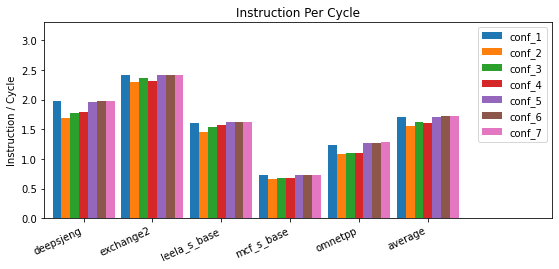

In [78]:
plot_ipc(0, 5)

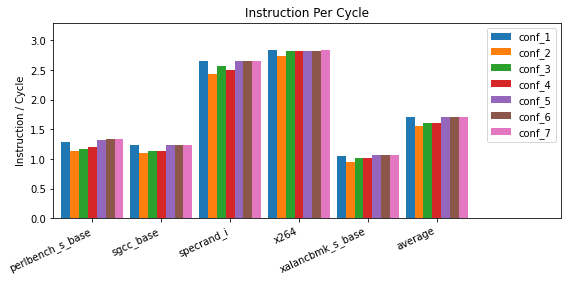

In [79]:
plot_ipc(5, 10)

In [83]:
def plot_dcms(start, end):
        specs = simple_names + ['average']
        x = np.arange(start = 0, stop = (end - start + 1) * 35, step = 35)
        width = 4.5
        sinlge_width = 4.5
        fig, ax = plt.subplots()
        plt.xlim((-20, 238))
        plt.ylim((0, 43))
        
        for i in range(1, 8):
            ax.bar(x - width * (4 - i), list(dcms_df.loc[F'conf_{i}', simple_names[start: end] + ['average']]), sinlge_width, label=F'conf_{i}', in_layout=False)

        ax.set_ylabel('DCache Miss Ratio %')
        ax.set_title('DCache Miss Ratio')
        ax.set_xticks(x, simple_names[start: end] + ['average'])
        ax.legend(loc='upper right')
        plt.subplots_adjust(bottom=0.2, right=1.3)
        plt.setp(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
    #     plt.show()
        plt.savefig(F'{image_path}/DCACHE_MISS_{start}{end}', dpi=200, bbox_inches='tight')

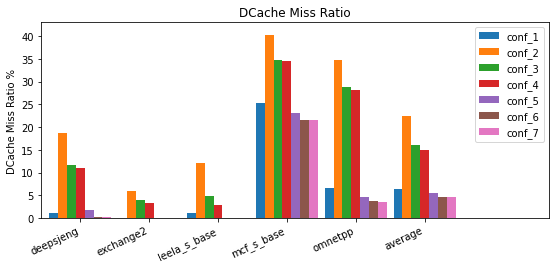

In [84]:
plot_dcms(0, 5)

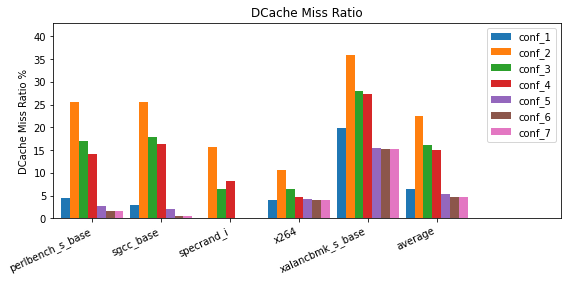

In [85]:
plot_dcms(5, 10)

In [88]:
def plot_dcms_stacked(start, end):
        x = np.arange(start = 0, stop = 6 * 35, step = 35)
        width = 4.5
        single_width = 4.5
        fig, ax = plt.subplots()
        plt.xlim((-20, 238))
        plt.ylim((0, 43))

        labeld = False
        
        for i in range(1, 8):
            btm = list(cold_df.loc[F'conf_{i}', simple_names[start: end] + ['average']] * dcms_df.loc[F'conf_{i}', simple_names[start: end] + ['average']] / dcms_no_df.loc[F'conf_{i}', simple_names[start: end] + ['average']])
            mid = list(cpt_df.loc[F'conf_{i}', simple_names[start: end] + ['average']] * dcms_df.loc[F'conf_{i}', simple_names[start: end] + ['average']] / dcms_no_df.loc[F'conf_{i}', simple_names[start: end] + ['average']])
            top = list(cft_df.loc[F'conf_{i}', simple_names[start: end] + ['average']] * dcms_df.loc[F'conf_{i}', simple_names[start: end] + ['average']] / dcms_no_df.loc[F'conf_{i}', simple_names[start: end] + ['average']])
            btm_mid = list(cpt_df.loc[F'conf_{i}', simple_names[start: end] + ['average']] * dcms_df.loc[F'conf_{i}', simple_names[start: end] + ['average']] / dcms_no_df.loc[F'conf_{i}', simple_names[start: end] + ['average']] + \
                cold_df.loc[F'conf_{i}', simple_names[start: end] + ['average']] * dcms_df.loc[F'conf_{i}', simple_names[start: end] + ['average']] / dcms_no_df.loc[F'conf_{i}', simple_names[start: end] + ['average']])
            ax.bar(x - width * (4 - i), btm, single_width, color='tab:red', label=F'Compulsory' if not labeld else '', in_layout=False)
            ax.bar(x - width * (4 - i), mid, single_width, color='tab:blue', label=F'Capacity' if not labeld else '', bottom=btm, in_layout=False)
            ax.bar(x - width * (4 - i), top, single_width, color='tab:orange', label=F'Conflict'  if not labeld else '', bottom=btm_mid, in_layout=False)
            labeld = True
        ax.set_ylabel('DCache Miss Ratio %')
        ax.set_title('DCache Miss Ratio (In Different Type)')
        ax.set_xticks(x, simple_names[start: end] + ['average'])
        ax.legend(loc='upper right')
        plt.subplots_adjust(bottom=0.2, right=1.3)
        plt.setp(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
        plt.savefig(F'{image_path}/DCACHE_MISS_STACKED_{start}{end}', dpi=200, bbox_inches='tight')

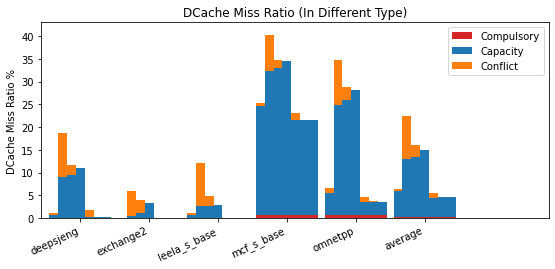

In [89]:
plot_dcms_stacked(0, 5)